In [1]:
#Redes neuronales convolucionales

In [2]:
#Descargar un dataset
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#Descompirimir
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-02 11:46:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 216.58.215.176, 142.250.184.176, 142.250.200.80, ...
Conectando con storage.googleapis.com (storage.googleapis.com)|216.58.215.176|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 109579078 (105M) [application/zip]
Gardando en: «pizza_steak.zip.9»

pizza_steak.zip.9   100%[===================>] 104,50M  8,77MB/s    in 13s     

2021-11-02 11:46:36 (7,81 MB/s) - gardouse «pizza_steak.zip.9» [109579078/109579078]



In [3]:
#Inspeccionar los datos
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os
#Mirar en el directorio y listar los elementos
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath},")

There are 2 directories and 1 images in 'pizza_steak,
There are 2 directories and 1 images in 'pizza_steak/train,
There are 0 directories and 750 images in 'pizza_steak/train/steak,
There are 0 directories and 750 images in 'pizza_steak/train/pizza,
There are 2 directories and 1 images in 'pizza_steak/test,
There are 0 directories and 250 images in 'pizza_steak/test/steak,
There are 0 directories and 250 images in 'pizza_steak/test/pizza,


In [7]:
#Cuidado con .DS_Store
!ls pizza_steak

test  train


In [8]:
#Otro camino para ver cuantas imagenes hay en un archivo 

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
#Conseguir secuencialmente los nombres de las clases

import pathlib
import numpy as np 

data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [10]:
#Visualizar una imagen
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    #Set up the target directory
    target_folder = target_dir+"/"+target_class
    #Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    #print(random_image)
    #Read the image and plot it
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape:{img.shape}")
    
    return img

Image shape:(512, 512, 3)


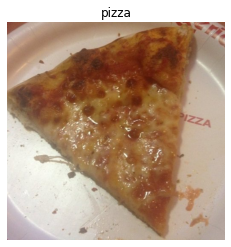

In [11]:
img = view_random_image("pizza_steak/train","pizza")

In [12]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[132,  63,  56],
        [131,  62,  55],
        [130,  61,  54],
        ...,
        [136,  79,  52],
        [137,  77,  53],
        [139,  79,  55]],

       [[132,  63,  56],
        [132,  63,  56],
        [132,  63,  56],
        ...,
        [138,  78,  54],
        [141,  81,  57],
        [145,  85,  61]],

       [[133,  65,  56],
        [134,  66,  57],
        [136,  68,  59],
        ...,
        [135,  75,  51],
        [139,  79,  55],
        [145,  84,  63]],

       ...,

       [[171, 143, 155],
        [177, 149, 161],
        [183, 157, 168],
        ...,
        [184, 169, 162],
        [182, 167, 160],
        [180, 165, 158]],

       [[152, 122, 134],
        [163, 133, 145],
        [176, 148, 160],
        ...,
        [183, 168, 161],
        [183, 168, 161],
        [182, 167, 160]],

       [[132, 100, 113],
        [147, 115, 128],
        [167, 137, 149],
        ...,
        [183, 168, 16

In [13]:
img.shape

(512, 512, 3)

In [14]:
#Scalar, 
img/255.0

array([[[0.51764706, 0.24705882, 0.21960784],
        [0.51372549, 0.24313725, 0.21568627],
        [0.50980392, 0.23921569, 0.21176471],
        ...,
        [0.53333333, 0.30980392, 0.20392157],
        [0.5372549 , 0.30196078, 0.20784314],
        [0.54509804, 0.30980392, 0.21568627]],

       [[0.51764706, 0.24705882, 0.21960784],
        [0.51764706, 0.24705882, 0.21960784],
        [0.51764706, 0.24705882, 0.21960784],
        ...,
        [0.54117647, 0.30588235, 0.21176471],
        [0.55294118, 0.31764706, 0.22352941],
        [0.56862745, 0.33333333, 0.23921569]],

       [[0.52156863, 0.25490196, 0.21960784],
        [0.5254902 , 0.25882353, 0.22352941],
        [0.53333333, 0.26666667, 0.23137255],
        ...,
        [0.52941176, 0.29411765, 0.2       ],
        [0.54509804, 0.30980392, 0.21568627],
        [0.56862745, 0.32941176, 0.24705882]],

       ...,

       [[0.67058824, 0.56078431, 0.60784314],
        [0.69411765, 0.58431373, 0.63137255],
        [0.71764706, 0

In [15]:
#An end to end example

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocesado(normalizar los valores de píxel)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
#Los caminos a los directorios
train_dir = "pizza_steak/train" 
test_dir = "pizza_steak/test"
#Import data de los directorios y batchearlos
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)
#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 51s 1s/step - loss: 0.5498 - accuracy: 0.7027 - val_loss: 0.3865 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 49s 1s/step - loss: 0.4367 - accuracy: 0.8053 - val_loss: 0.3528 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 48s 1s/step - loss: 0.3991 - accuracy: 0.8280 - val_loss: 0.3731 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 49s 1s/step - loss: 0.3656 - accuracy: 0.8460 - val_loss: 0.3023 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 55s 1s/step - loss: 0.3252 - accuracy: 0.8620 - val_loss: 0.3077 - val_accuracy: 0.8760


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [17]:
#Usando otro modelo en el mismo dataset
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.8816 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 249ms/step - loss: 3.8496 - accuracy: 0.6073 - val_loss: 1.1857 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.8959 - accuracy: 0.6813 - val_loss: 2.2596 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.7049 - accuracy: 0.7447 - val_loss: 0.4611 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5227 - accuracy: 0.7653 - val_loss: 0.5778 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5236 - accuracy: 0.7727 - val_loss: 0.4206 - val_accuracy: 0.8020


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
##Clasificación binaria- Estudio de la anterior CNN

Image shape:(512, 384, 3)
Image shape:(512, 512, 3)


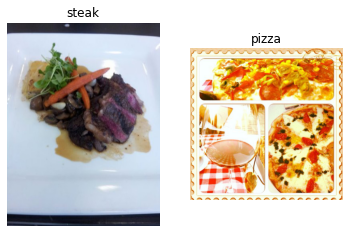

In [22]:
#Visualizar datos
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

In [23]:
#Preprocesado
#Definit los directorios del dataset

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


#Incluír batches en el dataset
#Crear train y test generators y reescalar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
#Tema batches y cargar las imagenes
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
#Get a sample of a batch
images,labels = train_data.next() #Coge el siguiente
len(images),len(labels)

(32, 32)

In [26]:
#Cuantos batches hay
len(train_data),1500//32

(47, 46)

In [27]:
#Mirar las primeras dos imagenes
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [29]:
##Crear una CNN para usar de baseline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [30]:
model_4 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding="Valid",
          activation="relu",
          input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [31]:
#Compilar
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [32]:
len(train_data),len(test_data)

(47, 16)

In [33]:
history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 1.0733 - accuracy: 0.6753 - val_loss: 0.4401 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.4482 - accuracy: 0.8160 - val_loss: 0.4394 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.3422 - accuracy: 0.8553 - val_loss: 0.4759 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.2295 - accuracy: 0.9193 - val_loss: 0.3819 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 63s 1s/step - loss: 0.0977 - accuracy: 0.9747 - val_loss: 0.4556 - val_accuracy: 0.8140


<AxesSubplot:>

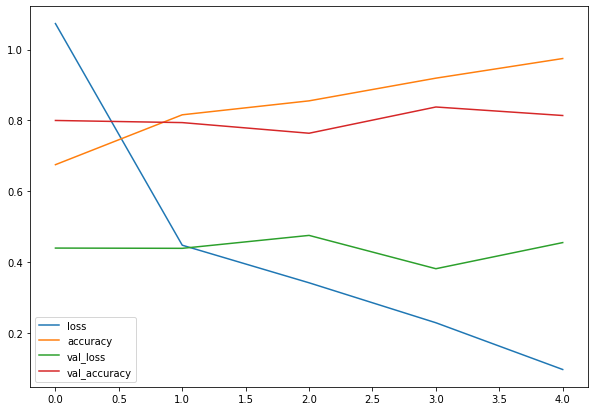

In [34]:
#Evalur el modelo
import pandas as pd 

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [35]:
#Plot validation and training curves separately
def plot_loss_curves(history):
    """
    Return separate loss curves for training and validation
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    

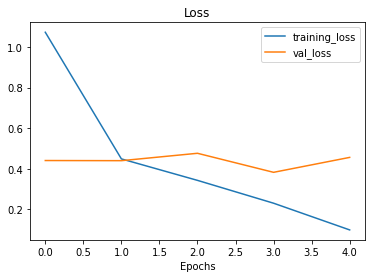

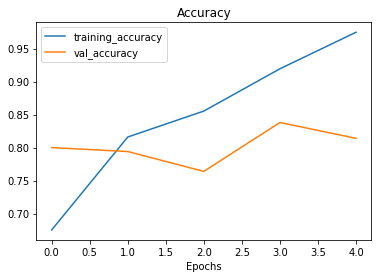

In [36]:
plot_loss_curves(history_4)

In [37]:
#Ajustar los parámetros del modelo
#Overfitting es malo, pero es el primer paso para mejorar
#un modelo baseline.
#Inducir overfitting: incrementar las conv layers,filtros o añadir
#más capas. 
#Reducir overfitting: Más datos, capas de regularización...

In [38]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [39]:
model_5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 410ms/step - loss: 0.6301 - accuracy: 0.6220 - val_loss: 0.5035 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 19s 406ms/step - loss: 0.4721 - accuracy: 0.7880 - val_loss: 0.4057 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4509 - accuracy: 0.8007 - val_loss: 0.3747 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 20s 431ms/step - loss: 0.4203 - accuracy: 0.8153 - val_loss: 0.3726 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 19s 410ms/step - loss: 0.3942 - accuracy: 0.8327 - val_loss: 0.3551 - val_accuracy: 0.8580


In [40]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

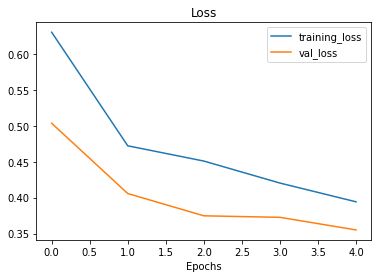

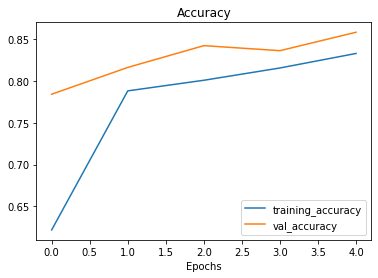

In [41]:
plot_loss_curves(history_5)

In [42]:
#Aumentación de datos
#Crear ImageDataGenerator training instance con data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)
#Crear ImageDataGenerator sin data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
#Importar datos y augmentarlo
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False)

#Crear no aumentados train data
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)
#Crear test data no aumentados
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [44]:
#La aumentación de datos se suele hacer en el entrenamiento. 
#Image data generator tiene parámetros para hacer el proceso. 

In [45]:
#Get sample data batches
images,labels = train_data.next() #labels no aumentadas, solo images
augmented_images,augmented_labels = train_data_augmented.next()

Showing image number:12


(-0.5, 223.5, 223.5, -0.5)

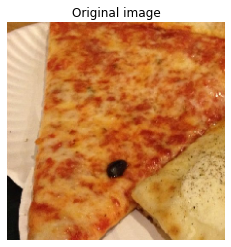

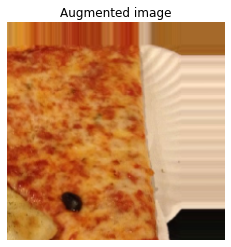

In [46]:
#Show original image and augmented image 
import random 

random_number = random.randint(0,32)
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [47]:
#Construir un modelo y ver como entrena en datos aumentados
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

pl

Epoch 1/5
47/47 [==============================] - 31s 646ms/step - loss: 0.7081 - accuracy: 0.4873 - val_loss: 0.6869 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 30s 639ms/step - loss: 0.6997 - accuracy: 0.5247 - val_loss: 0.6790 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 30s 641ms/step - loss: 0.6963 - accuracy: 0.5540 - val_loss: 0.6818 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 30s 637ms/step - loss: 0.6965 - accuracy: 0.5347 - val_loss: 0.6760 - val_accuracy: 0.5140
Epoch 5/5
47/47 [==============================] - 30s 638ms/step - loss: 0.6889 - accuracy: 0.5547 - val_loss: 0.6621 - val_accuracy: 0.7920


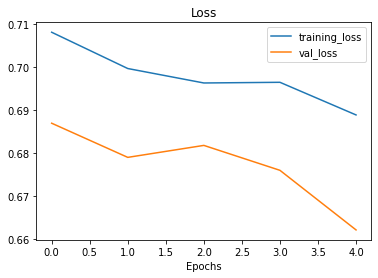

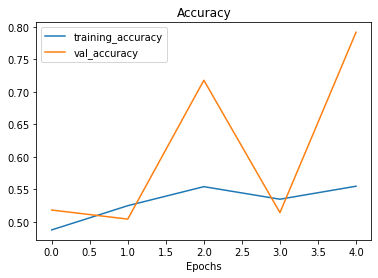

In [48]:
plot_loss_curves(history_6)

In [49]:
#Shufflear augmented training data y hacer el mismo modelo 

In [50]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode="binary",
                                                                           shuffle=True)


Found 1500 images belonging to 2 classes.


In [51]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer = Adam(),
               metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
           epochs=5,
           steps_per_epoch=len(train_data_augmented_shuffled),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 644ms/step - loss: 0.6415 - accuracy: 0.6273 - val_loss: 0.5445 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 30s 646ms/step - loss: 0.5557 - accuracy: 0.7187 - val_loss: 0.4254 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 30s 641ms/step - loss: 0.5153 - accuracy: 0.7440 - val_loss: 0.4504 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 30s 639ms/step - loss: 0.5066 - accuracy: 0.7580 - val_loss: 0.3476 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 30s 638ms/step - loss: 0.4780 - accuracy: 0.7693 - val_loss: 0.3676 - val_accuracy: 0.8420


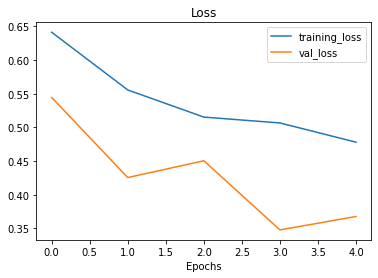

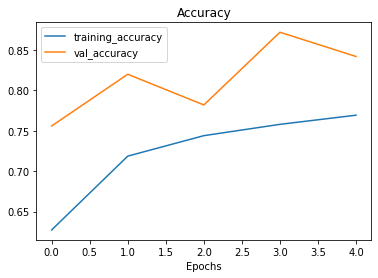

In [52]:
plot_loss_curves(history_7)

In [53]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [54]:
model_1_mod = Sequential([
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_1_mod.compile(loss="binary_crossentropy",
                   optimizer=Adam(),
                   metrics=["accuracy"])

hist_1_mod = model_1_mod.fit(train_data_augmented_shuffled,
           epochs=10,
           steps_per_epoch=len(train_data_augmented_shuffled),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 44s 923ms/step - loss: 0.6673 - accuracy: 0.5707 - val_loss: 0.5960 - val_accuracy: 0.6560
Epoch 2/10
47/47 [==============================] - 44s 921ms/step - loss: 0.5626 - accuracy: 0.7107 - val_loss: 0.4897 - val_accuracy: 0.7500
Epoch 3/10
47/47 [==============================] - 43s 916ms/step - loss: 0.5294 - accuracy: 0.7540 - val_loss: 0.4094 - val_accuracy: 0.8080
Epoch 4/10
47/47 [==============================] - 44s 919ms/step - loss: 0.5070 - accuracy: 0.7527 - val_loss: 0.3664 - val_accuracy: 0.8400
Epoch 5/10
47/47 [==============================] - 46s 976ms/step - loss: 0.5151 - accuracy: 0.7573 - val_loss: 0.3750 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 44s 917ms/step - loss: 0.4855 - accuracy: 0.7700 - val_loss: 0.3543 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 43s 907ms/step - loss: 0.4572 - accuracy: 0.7960 - val_loss: 0.3893 - val_accuracy: 0.8400

In [55]:
#Making a prediction with our trained model on our custom data
print(class_names)

['pizza' 'steak']


--2021-11-02 12:12:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 1978213 (1,9M) [image/jpeg]
Gardando en: «03-steak.jpeg.7»

03-steak.jpeg.7     100%[===================>]   1,89M  3,23MB/s    in 0,6s    

2021-11-02 12:12:01 (3,23 MB/s) - gardouse «03-steak.jpeg.7» [1978213/1978213]



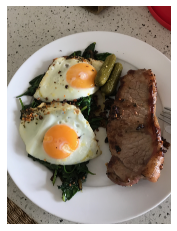

In [56]:
#View our example image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
#Check the shape
steak.shape

(4032, 3024, 3)

In [58]:
steak_tensor = tf.constant(tf.expand_dims(steak,axis=0))

In [59]:
model_7.predict(steak_tensor)

ValueError: in user code:

    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:421 call
        inputs, training=training, mask=mask)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/juan/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_11 is incompatible with the layer: expected axis -1 of input shape to have value 6760 but received input with shape (None, 1887520)


In [60]:
steak_tensor.shape

TensorShape([1, 4032, 3024, 3])

In [61]:
#When you want to make a prediction, preprocess the data 
#into the same format of training.
def load_prep_image(filename,img_shape=224):
    """Reads an image from filename, turns into tensor and reshapes"
    """
    #Read the image
    img = tf.io.read_file(filename)
    #Decode the ead file into a tensor
    img = tf.image.decode_image(img)
    #Resize the image
    img = tf.image.resize(img,size=[img_shape,img_shape])
    #Rescale the image (all values between 0 and 1)
    img = img/255
    return img

In [62]:
steak = load_prep_image("03-steak.jpeg")

In [63]:
pred =model_7.predict(tf.expand_dims(steak,axis=0))

In [64]:
#Looks like our custom image prints a probability, it would b enice
#to visualize
class_names

array(['pizza', 'steak'], dtype='<U9')

In [65]:
#Usar round para mostrar la predicted class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [66]:
def pred_and_plot(model,filename,class_names=class_names):
    """Imports an image located at filename, makes a prediction
    and plots the image with predicted class as title"""
    img = load_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False);

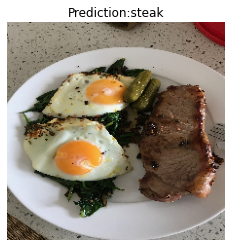

In [67]:
pred_and_plot(model_7,"03-steak.jpeg")

--2021-11-02 12:12:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 2874848 (2,7M) [image/jpeg]
Gardando en: «03-pizza-dad.jpeg.3»

03-pizza-dad.jpeg.3 100%[===================>]   2,74M  11,1MB/s    in 0,2s    

2021-11-02 12:12:16 (11,1 MB/s) - gardouse «03-pizza-dad.jpeg.3» [2874848/2874848]



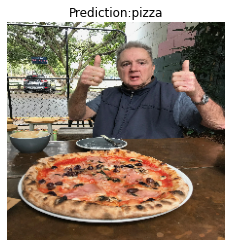

In [68]:
#Try in another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

--2021-11-02 12:12:17--  https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
Resolvendo iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)... 185.93.3.243
Conectando con iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)|185.93.3.243|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 405714 (396K) [image/jpeg]
Gardando en: «how-to-cook-steak-1061w.jpg.3»

how-to-cook-steak-1 100%[===================>] 396,21K  --.-KB/s    in 0,04s   

2021-11-02 12:12:17 (9,49 MB/s) - gardouse «how-to-cook-steak-1061w.jpg.3» [405714/405714]



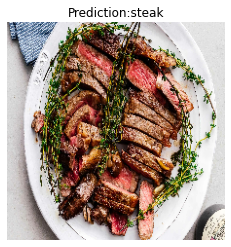

In [69]:
!wget https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
pred_and_plot(model_7,"how-to-cook-steak-1061w.jpg")


In [70]:
#Multi class image classification
#1.Hacerse uno con los datos
#2.Preprocesar los datos
#Crear un modelo
#Ajustarlo
#Evaluarlo
#Hiperparámetros


In [71]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-02 12:12:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 142.250.201.80, 142.250.200.80, 216.58.209.80, ...
Conectando con storage.googleapis.com (storage.googleapis.com)|142.250.201.80|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 519183241 (495M) [application/zip]
Gardando en: «10_food_classes_all_data.zip.3»

10_food_classes_all 100%[===================>] 495,13M  14,5MB/s    in 41s     

2021-11-02 12:12:59 (12,1 MB/s) - gardouse «10_food_classes_all_data.zip.3» [519183241/519183241]



In [72]:
import os 
#Walk through
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [73]:
#Setup the train and test directorie
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [74]:
import pathlib
import numpy as np
data_dir =pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape:(512, 384, 3)


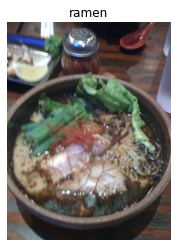

In [75]:

import random 
img = view_random_image(train_dir,random.choice(class_names))

In [76]:
#Preprocesar los datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode ="categorical")
test_datagen = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [77]:
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape = (224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
    
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_8 = model_8.fit(train_datagen,
                        epochs=5,
                       steps_per_epoch = len(train_datagen),
                       validation_data=test_datagen,
                       validation_steps=len(test_datagen))

Epoch 1/5
235/235 [==============================] - 254s 1s/step - loss: 2.2099 - accuracy: 0.1749 - val_loss: 2.1053 - val_accuracy: 0.2288
Epoch 2/5
235/235 [==============================] - 248s 1s/step - loss: 1.9552 - accuracy: 0.3144 - val_loss: 2.0083 - val_accuracy: 0.2972
Epoch 3/5
235/235 [==============================] - 248s 1s/step - loss: 1.5942 - accuracy: 0.4552 - val_loss: 2.0513 - val_accuracy: 0.2932
Epoch 4/5
235/235 [==============================] - 247s 1s/step - loss: 1.0392 - accuracy: 0.6543 - val_loss: 2.5864 - val_accuracy: 0.2516
Epoch 5/5
235/235 [==============================] - 248s 1s/step - loss: 0.4115 - accuracy: 0.8755 - val_loss: 3.7710 - val_accuracy: 0.2464


In [78]:
##5. Evaluate the model 
model_8.evaluate(test_datagen)

79/79 [==============================] - 19s 236ms/step - loss: 3.7710 - accuracy: 0.2464


[3.770986795425415, 0.24639999866485596]

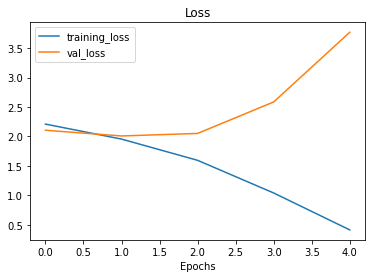

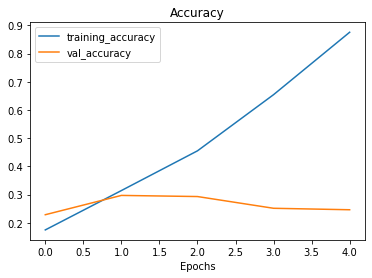

In [79]:
#check loss curves
plot_loss_curves(history_8)

In [80]:
#Está overfitteando, hay que ajustar los parámetros para arreglarlo
#Otras maneras: tener más datos, simplificar su arquitectura, 
#en capas o en unidades ocultas, usar data augmentation o
#transfer learning

In [81]:
#Simplificación
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [82]:
#Cargarse dos Conv2D
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


In [83]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [84]:
#Fit the simplified model
history_9 = model_9.fit(train_datagen,
                       epochs=5,
                       steps_per_epoch=len(train_datagen),
                       validation_data=test_datagen,
                       validation_steps=len(test_datagen))

Epoch 1/5
235/235 [==============================] - 99s 418ms/step - loss: 2.1306 - accuracy: 0.2547 - val_loss: 1.9563 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 95s 404ms/step - loss: 1.8268 - accuracy: 0.3788 - val_loss: 1.9114 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 94s 400ms/step - loss: 1.4937 - accuracy: 0.5043 - val_loss: 1.9354 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 92s 393ms/step - loss: 1.0346 - accuracy: 0.6760 - val_loss: 2.1435 - val_accuracy: 0.3124
Epoch 5/5
235/235 [==============================] - 92s 390ms/step - loss: 0.5719 - accuracy: 0.8320 - val_loss: 2.7943 - val_accuracy: 0.2720


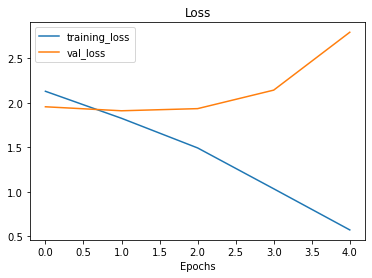

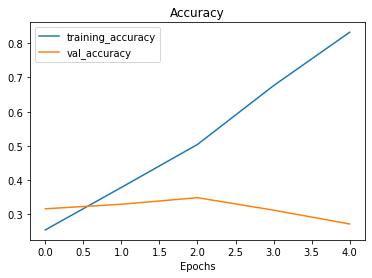

In [85]:
#Check loss curves
plot_loss_curves(history_9)

In [86]:
#Simplificar no ha funcionado, por lo que intentaremos data 
#augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_augmented = ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True) 

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                class_mode = "categorical")
test_data = ImageDataGenerator(rescale=1./255)
test_data = test_data.flow_from_directory(test_dir,
                                         target_size=(224,224),
                                         class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [87]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
           epochs=5,
           steps_per_epoch=len(train_data_augmented),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 253s 1s/step - loss: 2.2586 - accuracy: 0.1543 - val_loss: 2.1677 - val_accuracy: 0.1920
Epoch 2/5
235/235 [==============================] - 266s 1s/step - loss: 2.1485 - accuracy: 0.2167 - val_loss: 2.0212 - val_accuracy: 0.2676
Epoch 3/5
235/235 [==============================] - 226s 960ms/step - loss: 2.0732 - accuracy: 0.2527 - val_loss: 1.9859 - val_accuracy: 0.3016
Epoch 4/5
235/235 [==============================] - 224s 952ms/step - loss: 2.0319 - accuracy: 0.2793 - val_loss: 1.8647 - val_accuracy: 0.3440
Epoch 5/5
235/235 [==============================] - 232s 987ms/step - loss: 1.9741 - accuracy: 0.3179 - val_loss: 1.8177 - val_accuracy: 0.3664


In [88]:
model_8.evaluate(test_data)

79/79 [==============================] - 19s 242ms/step - loss: 3.7710 - accuracy: 0.2464


[3.770986318588257, 0.24639999866485596]

In [89]:
model_10.evaluate(test_data)

79/79 [==============================] - 20s 248ms/step - loss: 1.8177 - accuracy: 0.3664


[1.817738652229309, 0.36640000343322754]

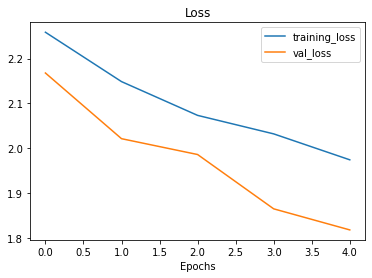

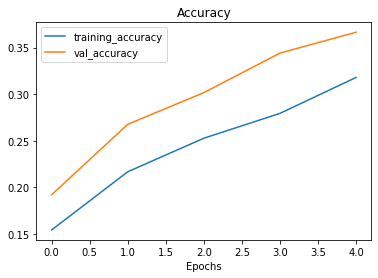

In [90]:
plot_loss_curves(history_10)

In [91]:
#Data augmentation reduce el overfitting, no obstante la accuracy
#mejorable
#Ahora, repeat until satisfied
#Más cosas que se pueden hacer para mejorar el modelo
#Reestructurar la arquitectura
#Ajustar el learning rate
#Métodos diferentes de aumentación de datos
#Más duración del entrenamiento
#Probar el transfer learning

In [92]:
#Haciendo predicciones con el modelo entrenado
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [93]:
#Descargar una imagen
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg



--2021-11-02 13:02:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conectado.
Petición HTTP enviada, agardando unha resposta... 200 OK
Lonxitude: 3564285 (3,4M) [image/jpeg]
Gardando en: «03-hamburger.jpeg.2»

03-hamburger.jpeg.2 100%[===================>]   3,40M  9,94MB/s    in 0,3s    

2021-11-02 13:02:45 (9,94 MB/s) - gardouse «03-hamburger.jpeg.2» [3564285/3564285]

--2021-11-02 13:02:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conectado.
Petic

In [94]:
def pred_and_plot(model,filename,class_names=class_names):
    """Imports an image located at filename, makes a prediction
    and plots the image with predicted class as title"""
    img = load_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    if len(pred[0])>1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[pred[0].index(max(pred[0]))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False);

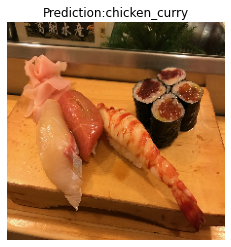

In [95]:
#make a prediction using model_10
pred_and_plot(model_10,"03-sushi.jpeg",class_names)

In [96]:
#No funciona bien en multiclass. Hará falta transfer, 
#de momento, guardar y cargar una CNN

In [97]:
model_10.save("el_modelo_del_acabe")

INFO:tensorflow:Assets written to: el_modelo_del_acabe/assets


In [98]:
loaded_model_10 = tf.keras.models.load_model("el_modelo_del_acabe")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 20s 257ms/step - loss: 1.8177 - accuracy: 0.3664


[1.817738652229309, 0.36640000343322754]

In [99]:
model_10.evaluate(test_data)

79/79 [==============================] - 21s 265ms/step - loss: 1.8177 - accuracy: 0.3664


[1.8177385330200195, 0.36640000343322754]

## Homework
Computer vision binary dataset, build neural network to analyze it

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [128]:
(train_ds,val_ds,test_ds), metadata = tfds.load(
    "tf_flowers",
    split = ["train[:80%]","train[80%:90%]","train[90%:]"],
    with_info = True,
    as_supervised = True,
)

In [129]:
num_classes = metadata.features["label"].num_classes
num_classes

5

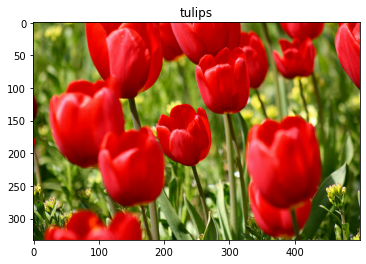

In [130]:
get_label_name = metadata.features["label"].int2str
image,label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [131]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

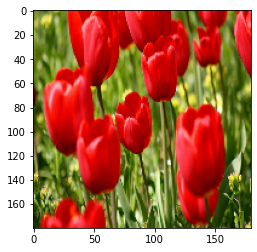

In [132]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [133]:
result.numpy().min(),result.numpy().max()

(0.0, 1.0)

In [134]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [135]:
image = tf.expand_dims(image,0)

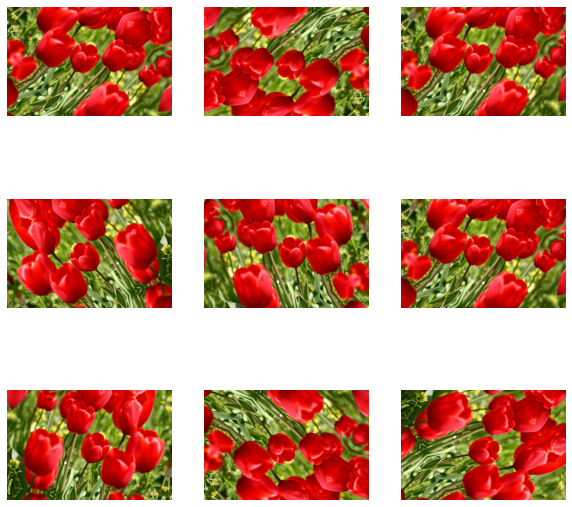

In [140]:
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

## Un par de detalles

Primero, que hay más tipos de capas de preprocesamiento. 
Hay dos formas de usar estas capas de preprocesamiento, se pueden incluír directamente en el modelo, lo cual hace que se puedan guardar directamente y beneficiar de la GPU; o también se pueden aplicar a los datos, con lo que nos ahorramos el tiempo del preprocesado en la compilación y fiteo del modelo. 

In [111]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D()
])
#Manera 1 

In [112]:
#Manera 2
aug_ds = train_ds.map(lambda x,y: (resize_and_rescale(x,training=True),y))

In [113]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds,shuffle=False,augment=False):
    #Resize and rescale the datasets
    ds = ds.map(lambda x,y:(resize_and_rescale(x),y),
               num_parallel_calls=AUTOTUNE)
    if shuffle : 
        ds = ds.shuffle(1000)
    #Batch the datasets
    ds = ds.batch(batch_size)
    #Use data augmentation only on the training set
    if augment:
        ds = ds.map(lambda x,y:(data_augmentation(x,training=True),y),
                                                num_parallel_calls=AUTOTUNE)
    #Buffer prefetch on all datasets
    return ds.prefetch(buffer_size = AUTOTUNE)

In [114]:
train_ds = prepare(train_ds,shuffle=True,augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [115]:
model = tf.keras.Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes,activation="softmax")
])

In [116]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer="adam",metrics=["accuracy"])

In [117]:
history_hw = model.fit(train_ds,epochs=5,validation_data = val_ds)

Epoch 1/5
92/92 [==============================] - 42s 437ms/step - loss: 1.3536 - accuracy: 0.4176 - val_loss: 1.1632 - val_accuracy: 0.5041
Epoch 2/5
92/92 [==============================] - 40s 430ms/step - loss: 1.1054 - accuracy: 0.5582 - val_loss: 1.0662 - val_accuracy: 0.5749
Epoch 3/5
92/92 [==============================] - 40s 430ms/step - loss: 1.0010 - accuracy: 0.6015 - val_loss: 0.9924 - val_accuracy: 0.6104
Epoch 4/5
92/92 [==============================] - 40s 433ms/step - loss: 0.9278 - accuracy: 0.6349 - val_loss: 0.9503 - val_accuracy: 0.6431
Epoch 5/5
92/92 [==============================] - 44s 474ms/step - loss: 0.8945 - accuracy: 0.6468 - val_loss: 0.9258 - val_accuracy: 0.6567


In [118]:
loss,acc = model.evaluate(test_ds)

12/12 [==============================] - 2s 103ms/step - loss: 0.8430 - accuracy: 0.6540


## Aumento de datos personalizado

Las características son custom, en este caso, por ejemplo, probabilísticamente se aplica un negativo

In [137]:
#Definir la función asociada a la operación 

def random_invert_img(x,p=0.5):
    if tf.random.uniform([]) < p:
        x = (255-x)
    else:
        x
    return

In [138]:
def random_invert(factor=0.5):
    return layers.Lambda(lambda x:random_invert_img(x,factor))
#capas lambda permiten hacer una operación directamente

random_invert = random_invert()


TypeError: 'NoneType' object is not subscriptable

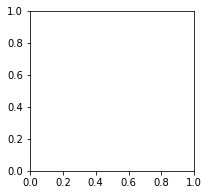

In [147]:
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image = random_invert(tf.squeeze(image))
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")

Deprecado, nos pasamos a tf.image. Tanto ésta como tf.data permiten un control más preciso del flujo de datos de entrada. Comenzamos de nuevo. Creamos la función visualize y exploramos las diferentes funciones de modificación de la imagen que vienen asociadas a brillo, saturación, cortes...

In [156]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

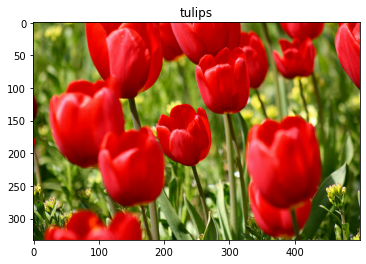

In [157]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [158]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

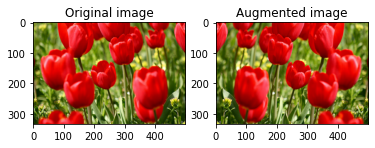

In [159]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

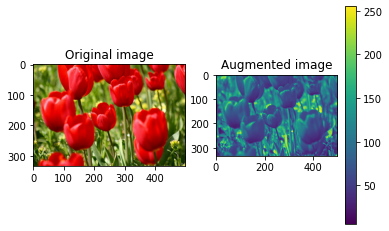

In [160]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

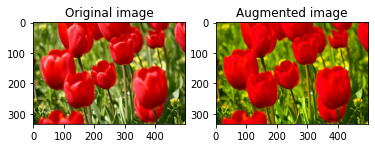

In [161]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

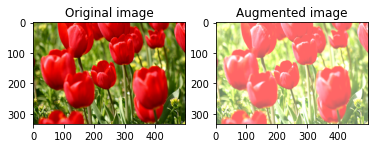

In [162]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

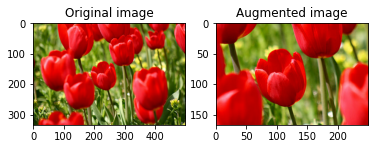

In [163]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

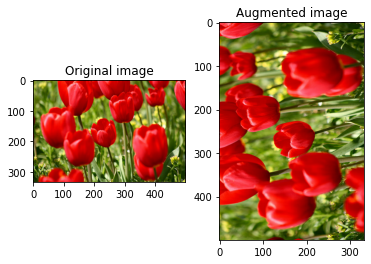

In [164]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

Existen operaciones asociadas a tf.image que basicamente aleatorizan las operaciones sobre las imágenes 

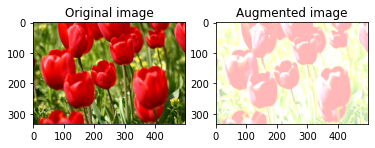

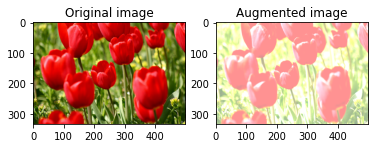

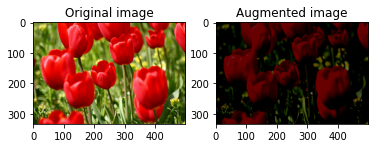

In [166]:
for i in range(3):
  seed = (i+1, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

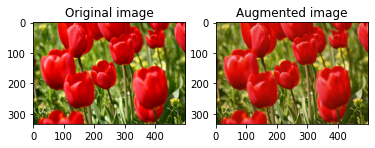

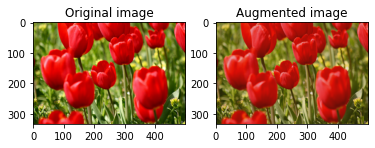

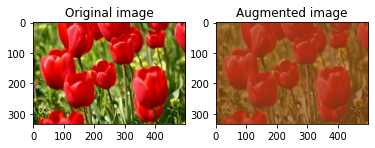

In [168]:
for i in range(3):
  seed = (i+1, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_contrast(
      image, 0.2,0.95, seed=seed)
  visualize(image, stateless_random_brightness)

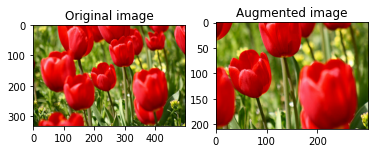

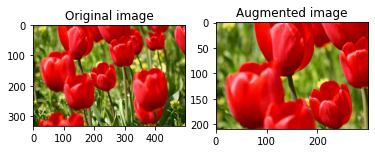

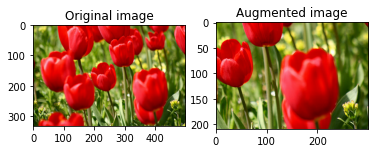

In [169]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

In [172]:
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [173]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [174]:
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

In [175]:
# Create a `Counter` object and `Dataset.zip` it together with the trainining set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

In [176]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [177]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [178]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

Para aplicar las transformaciones aleatorias a un conjunto de datos de manera secuencial, se puede crear un Counter, tal que aplique una seed aleatoria contada sobre un zip del dataset. Otra manera de hacerlo es crear un generador y llamar a la funcion _make seeds_ para irla cambiando.

In [179]:


# Create a generator.
rng = tf.random.Generator.from_seed(123, alg='philox')

In [180]:
# Create a wrapper function for updating seeds.
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

In [181]:
train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [182]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [183]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)